In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from bs4 import BeautifulSoup
import pandas as pd
import requests
import requests
import seaborn as sn
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.probability import FreqDist

In [2]:
# client_id and client_secret obtained from Spotify developer account
client_id = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx" # replace with your clien_id and client_secret
client_secret = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API
name = "{Justin Beiber}" #chosen artist
result = sp.search(name) #search query
#result['tracks']['items'][0]['artists']
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/2tIP7SsRs7vjIcLrU85W8J'},
  'href': 'https://api.spotify.com/v1/artists/2tIP7SsRs7vjIcLrU85W8J',
  'id': '2tIP7SsRs7vjIcLrU85W8J',
  'name': 'The Kid LAROI',
  'type': 'artist',
  'uri': 'spotify:artist:2tIP7SsRs7vjIcLrU85W8J'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/1uNFoZAHBGtllmzznpCI3s'},
  'href': 'https://api.spotify.com/v1/artists/1uNFoZAHBGtllmzznpCI3s',
  'id': '1uNFoZAHBGtllmzznpCI3s',
  'name': 'Justin Bieber',
  'type': 'artist',
  'uri': 'spotify:artist:1uNFoZAHBGtllmzznpCI3s'}]

In [3]:
result['tracks']['items'][0]['artists'][1]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/1uNFoZAHBGtllmzznpCI3s'},
 'href': 'https://api.spotify.com/v1/artists/1uNFoZAHBGtllmzznpCI3s',
 'id': '1uNFoZAHBGtllmzznpCI3s',
 'name': 'Justin Bieber',
 'type': 'artist',
 'uri': 'spotify:artist:1uNFoZAHBGtllmzznpCI3s'}

In [4]:
# Extracting the albums
#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][1]['uri']
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri,country='US')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
print(album_names)
print(album_uris)
#Keep names and uris in same order to keep track of duplicate albums


['Justice (The Complete Edition)', 'Justice (The Complete Edition)', 'Justice (Triple Chucks Deluxe)', 'Justice (Triple Chucks Deluxe)', 'Justice', 'Justice', 'Changes', 'Purpose (Deluxe)', 'Journals', 'Journals', 'Believe Acoustic', 'Believe Acoustic', 'Believe (Deluxe Edition)', 'Believe', 'Never Say Never - The Remixes', 'Under The Mistletoe', 'Under The Mistletoe', 'Under The Mistletoe (Deluxe Edition)', 'Under The Mistletoe (Deluxe Edition)', 'My World 2.0']
['spotify:album:3uPnO1aZBwMgWK1DI5zve9', 'spotify:album:5v2lj0w9VJIbjcUUKYLvlo', 'spotify:album:6mzpIm84OXCBxw6Tuhp1OA', 'spotify:album:7DjqzdD8MYtzgiJDGHltsp', 'spotify:album:5dGWwsZ9iB2Xc3UKR0gif2', 'spotify:album:0w1dwXfG5z6Xjjgj524JkD', 'spotify:album:63iWSELt9V1kV6RSMxN7Ii', 'spotify:album:6Fr2rQkZ383FcMqFyT7yPr', 'spotify:album:1rknZw4cyL9NInAqSwc8AA', 'spotify:album:7Cz0XcQzoxUi7L7sfgXLml', 'spotify:album:1RMfz6rbIyrQYChfcCoiJ4', 'spotify:album:4yz9rO7Q1UC2rK5eLOxmS7', 'spotify:album:70f70xLCpH7wHaVvB2oZT9', 'spotify:al

In [5]:
# Extracting songs from each album
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
#Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [6]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album Justice (The Complete Edition) songs has been added to spotify_albums dictionary
Album Justice (The Complete Edition) songs has been added to spotify_albums dictionary
Album Justice (Triple Chucks Deluxe) songs has been added to spotify_albums dictionary
Album Justice (Triple Chucks Deluxe) songs has been added to spotify_albums dictionary
Album Justice songs has been added to spotify_albums dictionary
Album Justice songs has been added to spotify_albums dictionary
Album Changes songs has been added to spotify_albums dictionary
Album Purpose (Deluxe) songs has been added to spotify_albums dictionary
Album Journals songs has been added to spotify_albums dictionary
Album Journals songs has been added to spotify_albums dictionary
Album Believe Acoustic songs has been added to spotify_albums dictionary
Album Believe Acoustic songs has been added to spotify_albums dictionary
Album Believe (Deluxe Edition) songs has been added to spotify_albums dictionary
Album Believe songs has been a

In [7]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        features = sp.audio_features(track)
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [8]:
# Loop through albums extracting the audio features
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    #print(i)
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 19.542473554611206 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 39.04003119468689 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 49.14247155189514 seconds
20 playlists completed
Loop #: 20
Elapsed Time: 60.27468180656433 seconds


In [9]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
        for feature in spotify_albums[album]:
            dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

314

In [10]:
# Create a dataframe
df = pd.DataFrame.from_dict(dic_df)
df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Justice (The Complete Edition),1,6i4G85fdtDwK6UpQba337E,2 Much,spotify:track:6i4G85fdtDwK6UpQba337E,0.59300,0.583,0.444,0.000000,0.3530,-8.601,0.0456,119.590,0.167,51
1,Justice (The Complete Edition),2,2t96tGXVqmNT9KbbIXyEP1,Deserve You,spotify:track:2t96tGXVqmNT9KbbIXyEP1,0.03140,0.677,0.633,0.000000,0.1120,-7.831,0.0771,89.934,0.409,51
2,Justice (The Complete Edition),3,5RE1BlC2bVRL02T0wcLq2X,As I Am (feat. Khalid),spotify:track:5RE1BlC2bVRL02T0wcLq2X,0.12700,0.595,0.543,0.000000,0.0975,-8.149,0.0380,99.928,0.109,51
3,Justice (The Complete Edition),4,3Ic8V1CEjOY53OVpo2k1Ap,Off My Face,spotify:track:3Ic8V1CEjOY53OVpo2k1Ap,0.92000,0.509,0.228,0.000000,0.1040,-8.680,0.0332,90.674,0.586,51
4,Justice (The Complete Edition),5,2HFHwTr1IBWheGoQtNNKtx,Holy (feat. Chance The Rapper),spotify:track:2HFHwTr1IBWheGoQtNNKtx,0.20000,0.670,0.693,0.000000,0.0909,-8.340,0.3500,87.017,0.388,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,My World 2.0,6,01BlGnXpLuC0BjgUxVYZFb,Never Let You Go,spotify:track:01BlGnXpLuC0BjgUxVYZFb,0.00141,0.660,0.811,0.000001,0.2510,-4.852,0.0357,103.191,0.675,57
310,My World 2.0,7,1tzkJMX3gNjnpcHdLD0pM3,Overboard,spotify:track:1tzkJMX3gNjnpcHdLD0pM3,0.18300,0.479,0.788,0.000000,0.1460,-5.212,0.0542,173.963,0.463,58
311,My World 2.0,8,75vEuMA15pb8JmgrGugHEs,Eenie Meenie,spotify:track:75vEuMA15pb8JmgrGugHEs,0.05250,0.718,0.588,0.000000,0.0991,-4.192,0.0318,121.220,0.812,0
312,My World 2.0,9,7wj1Lb5ggzMWJ9TqZJ2dwo,Up,spotify:track:7wj1Lb5ggzMWJ9TqZJ2dwo,0.08400,0.711,0.717,0.000000,0.0900,-4.317,0.0396,125.949,0.589,51


In [11]:
# Finding the nummber of unique values
df.nunique()

album                13
track_number         25
id                  314
name                135
uri                 314
acousticness        187
danceability        162
energy              156
instrumentalness     54
liveness            129
loudness            175
speechiness         171
tempo               204
valence             179
popularity           75
dtype: int64

In [12]:
# Listing the unique songs
df['name'].unique()

array(['2 Much', 'Deserve You', 'As I Am (feat. Khalid)', 'Off My Face',
       'Holy (feat. Chance The Rapper)', 'Unstable (feat. The Kid LAROI)',
       'MLK Interlude', 'Die For You (feat. Dominic Fike)', 'Hold On',
       'Somebody', 'Ghost', 'Peaches (feat. Daniel Caesar & Giveon)',
       'Love You Different (feat. BEAM)',
       'Loved By You (feat. Burna Boy)', 'Anyone',
       'Lonely (with benny blanco)', 'There She Go (feat. Lil Uzi Vert)',
       "I Can't Be Myself (feat. Jaden)", 'Lifetime',
       'Wish You Would (feat. Quavo)', 'Know No Better (feat. DaBaby)',
       'Name (feat. Tori Kelly)', 'Red Eye (feat. TroyBoi)',
       'Angels Speak', 'Hailey', 'Unstable (feat.The Kid LAROI)',
       'All Around Me', 'Habitual', 'Come Around Me',
       'Intentions (feat. Quavo)', 'Yummy', 'Available',
       'Forever (feat. Post Malone & Clever)',
       'Running Over (feat. Lil Dicky)', 'Take It Out On Me',
       'Second Emotion (feat. Travis Scott)', 'Get Me (feat. Kehlani)',

In [13]:
# Getting song lyrics 
#function to scrape lyrics from genius
def scrape_lyrics(artistname, songname):
    artistname2 = str(artistname.replace(' ','-')) if ' ' in artistname else str(artistname)
    #print(artistname2)
    songname2 = str(songname.replace(' ','-')) if ' ' in songname else str(songname)
    #print(songname2)
    page = requests.get('https://genius.com/'+ artistname2 + '-' + songname2 + '-' + 'lyrics')
    html = BeautifulSoup(page.text, 'html.parser')
    
    # Uncomment the below code to write the html response to  a file. This can be used for debugging.
    #with open("randomfile.html", "w") as external_file:
        #add_text = html
        #add_text = add_text.encode('utf-8').decode('ascii', 'ignore')
        #print(add_text, file=external_file)
        #external_file.close()

    lyrics1 = html.find("div", class_="lyrics")
    lyrics2 = html.find("div", class_="Lyrics__Container-sc-1ynbvzw-6 YYrds")
    # If you are unable to fetch the lyrics, check the class name from the file created in the commented section above.
    if lyrics1:
        lyrics = lyrics1.get_text()
    elif lyrics2:
        lyrics = lyrics2.get_text()
    elif lyrics1 == lyrics2 == None:
        lyrics = None
    return lyrics
artist_name='Justin Bieber'
#function to attach lyrics onto data frame
#artist_name should be inserted as a string
def lyrics_onto_frame(df1, artist_name):
    for i,x in enumerate(df1['name']):
        test = scrape_lyrics(artist_name, x)
        df1.loc[i, 'lyrics'] = test
    return df

In [14]:
df=lyrics_onto_frame(df, artist_name)

In [15]:
df.head(n=5)

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,lyrics
0,Justice (The Complete Edition),1,6i4G85fdtDwK6UpQba337E,2 Much,spotify:track:6i4G85fdtDwK6UpQba337E,0.5930,0.583,0.444,0.0,0.3530,-8.601,0.0456,119.590,0.167,51,[Intro: Martin Luther King Jr.]Injustice anywh...
1,Justice (The Complete Edition),2,2t96tGXVqmNT9KbbIXyEP1,Deserve You,spotify:track:2t96tGXVqmNT9KbbIXyEP1,0.0314,0.677,0.633,0.0,0.1120,-7.831,0.0771,89.934,0.409,51,[Verse 1]When I'm in my thoughts sometimesIt's...
2,Justice (The Complete Edition),3,5RE1BlC2bVRL02T0wcLq2X,As I Am (feat. Khalid),spotify:track:5RE1BlC2bVRL02T0wcLq2X,0.1270,0.595,0.543,0.0,0.0975,-8.149,0.0380,99.928,0.109,51,None
3,Justice (The Complete Edition),4,3Ic8V1CEjOY53OVpo2k1Ap,Off My Face,spotify:track:3Ic8V1CEjOY53OVpo2k1Ap,0.9200,0.509,0.228,0.0,0.1040,-8.680,0.0332,90.674,0.586,51,[Verse 1]One touch and you got me stonedHigher...
4,Justice (The Complete Edition),5,2HFHwTr1IBWheGoQtNNKtx,Holy (feat. Chance The Rapper),spotify:track:2HFHwTr1IBWheGoQtNNKtx,0.2000,0.670,0.693,0.0,0.0909,-8.340,0.3500,87.017,0.388,50,None


In [16]:
# create a dataframe for the features.
tf_df=pd.DataFrame()
tf_df['Name']=df['name']
tf_df['acousticness']=df['acousticness']
tf_df['danceability']=df['danceability']
tf_df['energy']=df['energy']
tf_df['instrumentalness']=df['instrumentalness']
tf_df['liveness']=df['liveness']
tf_df['loudness']=df['loudness']
tf_df['speechiness']=df['speechiness']
tf_df['tempo']=df['tempo']
tf_df['valence']=df['valence']

In [17]:
# Checking coorealtion between each features.
corr_matrix = tf_df.corr()
print(corr_matrix)

                  acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.431095 -0.826147         -0.022880   
danceability         -0.431095      1.000000  0.320201          0.006136   
energy               -0.826147      0.320201  1.000000          0.043439   
instrumentalness     -0.022880      0.006136  0.043439          1.000000   
liveness             -0.023074     -0.072662  0.200832         -0.047168   
loudness             -0.597394      0.380193  0.673098         -0.071891   
speechiness          -0.078622      0.044607  0.101750         -0.010375   
tempo                -0.149577      0.058928  0.231611          0.110524   
valence              -0.091513      0.452078  0.210977          0.116627   

                  liveness  loudness  speechiness     tempo   valence  
acousticness     -0.023074 -0.597394    -0.078622 -0.149577 -0.091513  
danceability     -0.072662  0.380193     0.044607  0.058928  0.452078  
energy            0.200

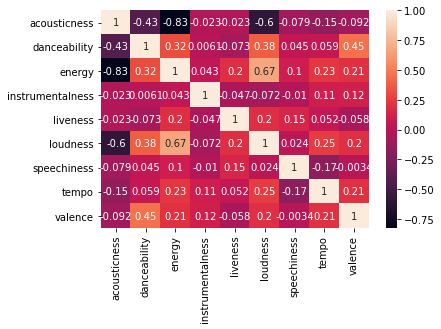

In [18]:
# Plotting the correlation heatmap
sn.heatmap(corr_matrix, annot=True)
plt.show()

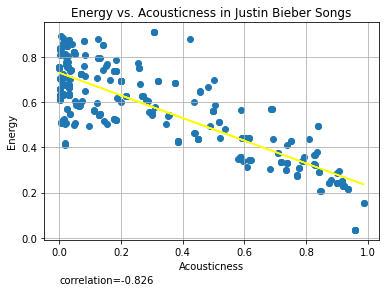

In [19]:
# creates a graph showing the relation between the energy of a song and its acousticness
plt.figure(2) # make a new figure

# create a scatterplot, acousticness on the x axis, energy on y
plt.scatter(x=tf_df['acousticness'], y=tf_df['energy'])
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.title('Energy vs. Acousticness in Justin Bieber Songs')
plt.grid(axis='both')

# calculate the correlation between the variables, 
# for these variables it is -0.68, which indicates 
# a fairly strong negative correlation (which means 
# when one variable's value goes up, the other one's 
# value tends to go down)
ae_correlation = tf_df[['energy', 'acousticness']].corr()
corr = str(ae_correlation['acousticness']['energy'])[:6]
plt.text(0,-0.2,"correlation=" + corr)

# calculate the line of best fit, plot it by calculating b and m to use as y=mx+b
ae_m, ae_b = np.polyfit(tf_df['acousticness'], tf_df['energy'], 1)
plt.plot(tf_df['acousticness'], ae_m*tf_df['acousticness']+ae_b,color='#ffff00')
plt.show()
plt.close()

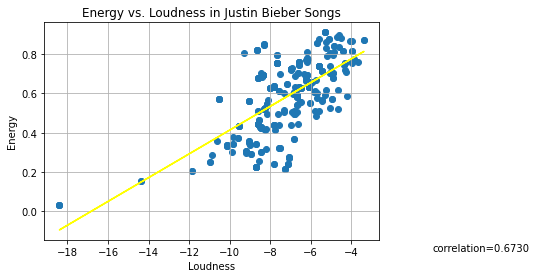

In [20]:
# creates a graph showing the relation between the energy of a song and its acousticness
plt.figure(2) # make a new figure

# create a scatterplot, acousticness on the x axis, energy on y
plt.scatter(x=tf_df['loudness'], y=tf_df['energy'])
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Energy vs. Loudness in Justin Bieber Songs')
plt.grid(axis='both')

# calculate the correlation between the variables, 
# for these variables it is -0.68, which indicates 
# a fairly strong negative correlation (which means 
# when one variable's value goes up, the other one's 
# value tends to go down)
ae_correlation = tf_df[['energy', 'loudness']].corr()
corr = str(ae_correlation['loudness']['energy'])[:6]
plt.text(0,-0.2,"correlation=" + corr)

# calculate the line of best fit, plot it by calculating b and m to use as y=mx+b
ae_m, ae_b = np.polyfit(tf_df['loudness'], tf_df['energy'], 1)
plt.plot(tf_df['loudness'], ae_m*tf_df['loudness']+ae_b,color='#ffff00')
plt.show()
plt.close()

In [21]:
# Let's check the 10 most popular Justin Bieber songs
df.sort_values(by='popularity', ascending=False).head(10)

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,lyrics
104,Justice,11,6I3mqTwhRpn34SLVafSH7G,Ghost,spotify:track:6I3mqTwhRpn34SLVafSH7G,0.1850,0.601,0.741,0.000029,0.4150,-5.569,0.0478,153.960,0.441,87,[Verse 1]Youngblood thinks there's always tomo...
105,Justice,12,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),spotify:track:4iJyoBOLtHqaGxP12qzhQI,0.3210,0.677,0.696,0.000000,0.4200,-6.181,0.1190,90.030,0.464,85,None
147,Purpose (Deluxe),5,50kpGaPAhYJ3sGmk6vplg0,Love Yourself,spotify:track:50kpGaPAhYJ3sGmk6vplg0,0.8350,0.609,0.378,0.000000,0.2800,-9.828,0.4380,100.418,0.515,83,[Produced by Benny Blanco][Verse 1]For all the...
146,Purpose (Deluxe),4,09CtPGIpYB4BrO8qb1RGsF,Sorry,spotify:track:09CtPGIpYB4BrO8qb1RGsF,0.0797,0.654,0.760,0.000000,0.2990,-3.669,0.0450,99.945,0.410,81,"[Written by Julia Michaels, Justin Tranter, an..."
304,My World 2.0,1,6epn3r7S14KUqlReYr77hA,Baby,spotify:track:6epn3r7S14KUqlReYr77hA,0.0401,0.728,0.859,0.000000,0.1110,-5.237,0.1370,65.043,0.535,81,[Produced by The-Dream and Tricky Stewart][Int...
120,Justice,11,5dPz35akJjPqb17yeqNwqH,Ghost,spotify:track:5dPz35akJjPqb17yeqNwqH,0.1780,0.604,0.741,0.000035,0.4090,-5.571,0.0475,153.947,0.473,79,[Verse 1]Youngblood thinks there's always tomo...
145,Purpose (Deluxe),3,4B0JvthVoAAuygILe3n4Bs,What Do You Mean?,spotify:track:4B0JvthVoAAuygILe3n4Bs,0.5900,0.845,0.567,0.001420,0.0811,-8.118,0.0956,125.020,0.793,78,None
97,Justice,4,3T03rPwlL8NVk1yIaxeD8U,Off My Face,spotify:track:3T03rPwlL8NVk1yIaxeD8U,0.9200,0.509,0.228,0.000000,0.1040,-8.680,0.0332,90.674,0.586,77,[Verse 1]One touch and you got me stonedHigher...
102,Justice,9,1nahzW3kfMuwReTka28tH5,Hold On,spotify:track:1nahzW3kfMuwReTka28tH5,0.0104,0.658,0.634,0.000000,0.1200,-6.068,0.0431,140.002,0.302,77,[Verse 1]You know you can call me if you need ...
129,Changes,4,4umIPjkehX1r7uhmGvXiSV,Intentions (feat. Quavo),spotify:track:4umIPjkehX1r7uhmGvXiSV,0.3000,0.806,0.546,0.000000,0.1020,-6.637,0.0575,147.986,0.874,76,None


In [22]:
# Processing and analysing song lyrics
# Create a dataframe with song name and lyrics
lyrics_df=pd.DataFrame()
lyrics_df['name']=df['name']
lyrics_df['lyrics']=df['lyrics']

In [23]:
lyrics_df.head()

,name,lyrics
0,2 Much,[Intro: Martin Luther King Jr.]Injustice anywh...
1,Deserve You,[Verse 1]When I'm in my thoughts sometimesIt's...
2,As I Am (feat. Khalid),None
3,Off My Face,[Verse 1]One touch and you got me stonedHigher...
4,Holy (feat. Chance The Rapper),None


In [24]:
# We can see that some lyrics weren't extracted
lyrics_df.nunique()

name      135
lyrics    108
dtype: int64

In [25]:
# Checking the datatypes
lyrics_df.dtypes

name      object
lyrics    object
dtype: object

In [26]:
#  Conversting lyrics to string data type
lyrics_df['lyrics']=lyrics_df['lyrics'].astype('str')

In [27]:
# removing all the songs without lyrics
new_lyrics=lyrics_df[lyrics_df.lyrics != 'None']

In [28]:
# Using regular expression we remove the newline '\n' characters from the lyrics. We also convert all the words to lowercase.
new_lyrics['cleaned_lyrics'] = new_lyrics['lyrics'].map(lambda x: re.sub(r'\n', ' ', x)).str.lower()
new_lyrics.head()

<ipython-input-28-7f0397f008ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lyrics['cleaned_lyrics'] = new_lyrics['lyrics'].map(lambda x: re.sub(r'\n', ' ', x)).str.lower()


,name,lyrics,cleaned_lyrics
0,2 Much,[Intro: Martin Luther King Jr.]Injustice anywh...,[intro: martin luther king jr.]injustice anywh...
1,Deserve You,[Verse 1]When I'm in my thoughts sometimesIt's...,[verse 1]when i'm in my thoughts sometimesit's...
3,Off My Face,[Verse 1]One touch and you got me stonedHigher...,[verse 1]one touch and you got me stonedhigher...
6,MLK Interlude,[Spoken Word: Martin Luther King Jr.]I say to ...,[spoken word: martin luther king jr.]i say to ...
8,Hold On,[Verse 1]You know you can call me if you need ...,[verse 1]you know you can call me if you need ...


In [29]:
# Removing texts in []
new_lyrics['cleaned_lyrics']=new_lyrics['cleaned_lyrics'].map(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))
#Removing Punctuations
new_lyrics['cleaned_lyrics']= new_lyrics['cleaned_lyrics'].str.replace('[^\w\s]','')

<ipython-input-29-6efe127f490f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lyrics['cleaned_lyrics']=new_lyrics['cleaned_lyrics'].map(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))
<ipython-input-29-6efe127f490f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  new_lyrics['cleaned_lyrics']= new_lyrics['cleaned_lyrics'].str.replace('[^\w\s]','')
<ipython-input-29-6efe127f490f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lyrics['cleaned_lyrics']

In [30]:
new_lyrics.head()

,name,lyrics,cleaned_lyrics
0,2 Much,[Intro: Martin Luther King Jr.]Injustice anywh...,injustice anywhere is a threat to justice ever...
1,Deserve You,[Verse 1]When I'm in my thoughts sometimesIt's...,when im in my thoughts sometimesits hard to be...
3,Off My Face,[Verse 1]One touch and you got me stonedHigher...,one touch and you got me stonedhigher than ive...
6,MLK Interlude,[Spoken Word: Martin Luther King Jr.]I say to ...,i say to you this morning that if you have nev...
8,Hold On,[Verse 1]You know you can call me if you need ...,you know you can call me if you need someoneil...


In [31]:
# Tokenize the lyrics
def lyrics_tokens(x):
    return word_tokenize(x)
new_lyrics['tokenized'] = new_lyrics['cleaned_lyrics'].map(lambda x: lyrics_tokens(x))
new_lyrics.head()

<ipython-input-31-754fa2d3cab0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lyrics['tokenized'] = new_lyrics['cleaned_lyrics'].map(lambda x: lyrics_tokens(x))


,name,lyrics,cleaned_lyrics,tokenized
0,2 Much,[Intro: Martin Luther King Jr.]Injustice anywh...,injustice anywhere is a threat to justice ever...,"[injustice, anywhere, is, a, threat, to, justi..."
1,Deserve You,[Verse 1]When I'm in my thoughts sometimesIt's...,when im in my thoughts sometimesits hard to be...,"[when, im, in, my, thoughts, sometimesits, har..."
3,Off My Face,[Verse 1]One touch and you got me stonedHigher...,one touch and you got me stonedhigher than ive...,"[one, touch, and, you, got, me, stonedhigher, ..."
6,MLK Interlude,[Spoken Word: Martin Luther King Jr.]I say to ...,i say to you this morning that if you have nev...,"[i, say, to, you, this, morning, that, if, you..."
8,Hold On,[Verse 1]You know you can call me if you need ...,you know you can call me if you need someoneil...,"[you, know, you, can, call, me, if, you, need,..."


In [32]:
# Remove stopwords
stop = stopwords.words('english')

def remove_stopwords(text):
    t = [token for token in text if token not in stop]
    text = ' '.join(t)    
    return text

In [33]:
new_lyrics['stopword_removed']=new_lyrics['tokenized'].apply(remove_stopwords)

<ipython-input-33-12a2f7974279>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lyrics['stopword_removed']=new_lyrics['tokenized'].apply(remove_stopwords)


In [34]:
new_lyrics.tail()

,name,lyrics,cleaned_lyrics,tokenized,stopword_removed
308,Runaway Love,"[Verse 1]You see, my baby up and hit the roadW...",you see my baby up and hit the roadwhere shes ...,"[you, see, my, baby, up, and, hit, the, roadwh...",see baby hit roadwhere shes going swear nobody...
309,Never Let You Go,[Verse 1]They say that hate has been sentSo le...,they say that hate has been sentso let loose t...,"[they, say, that, hate, has, been, sentso, let...",say hate sentso let loose talk lovebefore outl...
310,Overboard,[Verse 1: Jessica Jarrell]It feels like we've ...,it feels like weve been out at sea ohso back a...,"[it, feels, like, weve, been, out, at, sea, oh...",feels like weve sea ohso back forth thats seem...
312,Up,"[Verse 1]It's a big, big worldIt's easy to get...",its a big big worldits easy to get lost in ity...,"[its, a, big, big, worldits, easy, to, get, lo...",big big worldits easy get lost ityouve always ...
313,That Should Be Me,[Verse 1]Everybody's laughing in my mindRumour...,everybodys laughing in my mindrumours spreadin...,"[everybodys, laughing, in, my, mindrumours, sp...",everybodys laughing mindrumours spreading bout...


In [35]:
#remove unwanted words
unwanted = ['man','give','way','come','make','back','know','like', 'ta', 'til','try','even','could','still','well','want','wan','na','take','dont','la','yeah','oh','gon','get','go','got','im','pum','rum','pa','aint','ill']
new_lyrics['final_ly'] = new_lyrics['stopword_removed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (unwanted)]))

<ipython-input-35-d40f4901a3da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lyrics['final_ly'] = new_lyrics['stopword_removed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (unwanted)]))


In [36]:
# Join the lyrics to a single text for generating wordcloud
text = " ".join(twt for twt in new_lyrics['final_ly'])
words = word_tokenize(text)

print ("There are {} words in the JustinBieber Lyrics dataset.".format(len(words)))
print ("There are {} unique words in the Justin Bieber Lyrics dataset.".format(len(set(words))))

There are 17811 words in the JustinBieber Lyrics dataset.
There are 3117 unique words in the Justin Bieber Lyrics dataset.


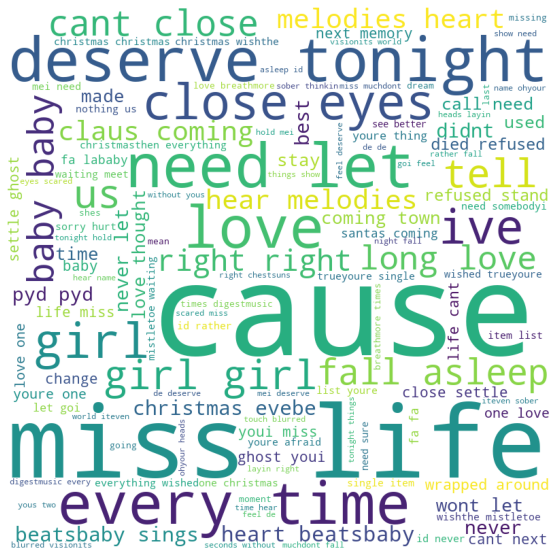

In [37]:
#Generate WordCloud
wc= WordCloud(width = 800, height = 800,background_color="white", min_font_size = 10, stopwords=STOPWORDS).generate(text)

#Plot World Cloud
plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [38]:
# NLTK analysis
words = word_tokenize(text)
fdist = FreqDist(words)
fdist.most_common(3)

[('love', 258), ('need', 249), ('youre', 230)]

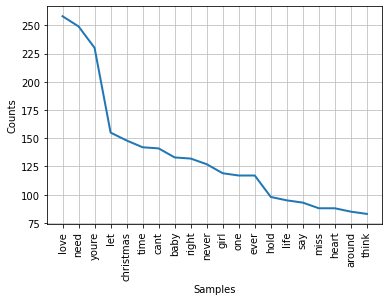

In [39]:
#Frequency Distribution
fdist.plot(20,cumulative=False)
plt.show()

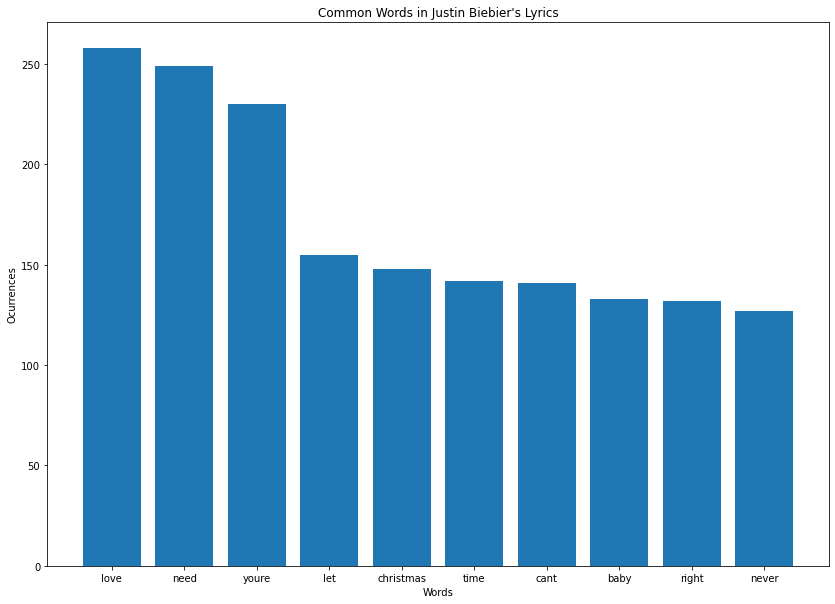

In [40]:
#Common Words Bar Graph
x , y = zip(*(fdist.most_common(10)))
plt.figure(figsize=(14, 10))
plt.bar(x, y)

plt.title("Common Words in Justin Biebier's Lyrics")
plt.xlabel('Words')
plt.ylabel('Ocurrences')
plt.show()